In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [2]:
# City population times 10,000
x_train = np.array(
    [ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369
    ]
)

In [3]:
# Restaurant's average monthly profit in units of $10,000.
y_train = np.array(
    [17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
        4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
        3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
        3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
        3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
       -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
        4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
        5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
        8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
        1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
        5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
        5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
        1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
        6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
        5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
        1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
        0.61705
     ]
)

In [4]:
print(len(x_train), len(y_train))

97 97


Text(0.5, 0, 'Population of City in 10,000s')

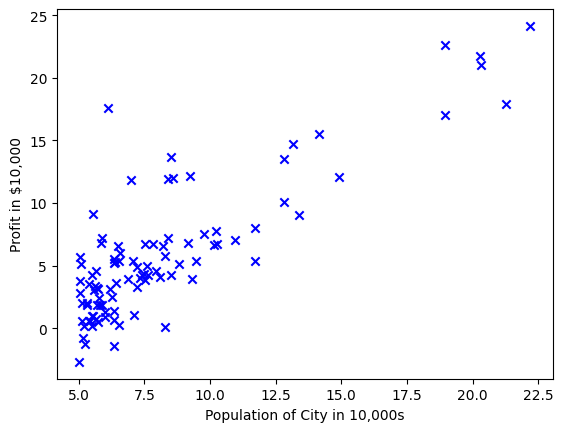

In [5]:
plt.scatter(x_train, y_train, marker="x", c="b")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")

In [6]:
def compute_cost(x, y, w, b):
    m = x.shape[0] # number of column
    cost = 0
    for i in range(m):
        cost += (w * x[i] + b - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [7]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0] # number of column
    for i in range(m):
        dj_dw += (x[i] * w + b - y[i]) * x[i]
        dj_db += (x[i] * w + b - y[i])
    dj_dw, dj_db = dj_dw / m, dj_db / m
    return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    m = x.shape[0] # number of column
    w = w_init
    b = b_init
    cost = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost.append(compute_cost(x_train, y_train, w, b))
    return w, b, cost

1.166362350335582 -3.63029143940436


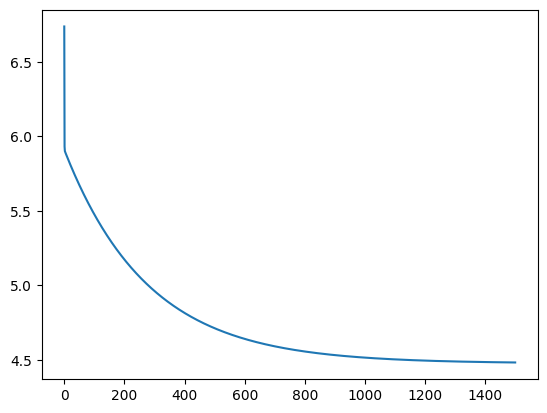

In [9]:
w, b, cost = gradient_descent(x_train, y_train, 0, 0, 0.01, 1500)
print(w, b)
plt.plot(cost)

In [10]:
predicted = x_train * w + b

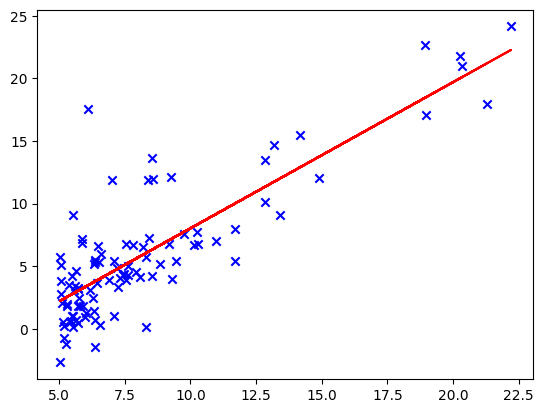

In [11]:
plt.plot(x_train, predicted, c = "r")
plt.scatter(x_train, y_train, marker = "x", c = "b")